<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/calvin-finding-datasets/Finding_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Datasets for your ML Projects
Finding or preparing a dataset can often be one the most time consuming aspects of machine learning! While some more ML fields like reinforcement learning can generate data from a simulation, we often rely on data that has been generated and compiled by humans. Luckily, there a few useful online resources to speedup the dataset search! This notebook will walk you through loading datasets from .csv files or from the Kaggle api. We will also discuss some important criteria to keep in mind when choosing a dataset, and how to use Google Dataset Search.

# Dataset Criteria
When looking for a dataset to use, its important to keep a few questions in mind:


1.   How many examples does the dataset contain? Most ML projects will require at least a few hundred if not a few thousand datapoints. Alternatively, if the datset is too large, does my computer have enough memory to work with this data?
2.   Where did this data come from? Who collected it? Can I trust the source?
3.   Is this data representative of the data my model might see in a real world use case? Even if your model achieves high accuracy while training, it might not generalize to real life use cases if the training data is very different.


# Google Dataset Search
One amazing resource for finding datasets is [Google Dataset Search](https://datasetsearch.research.google.com/). GDS searches many dataset compilation sites for datasets that match your query.

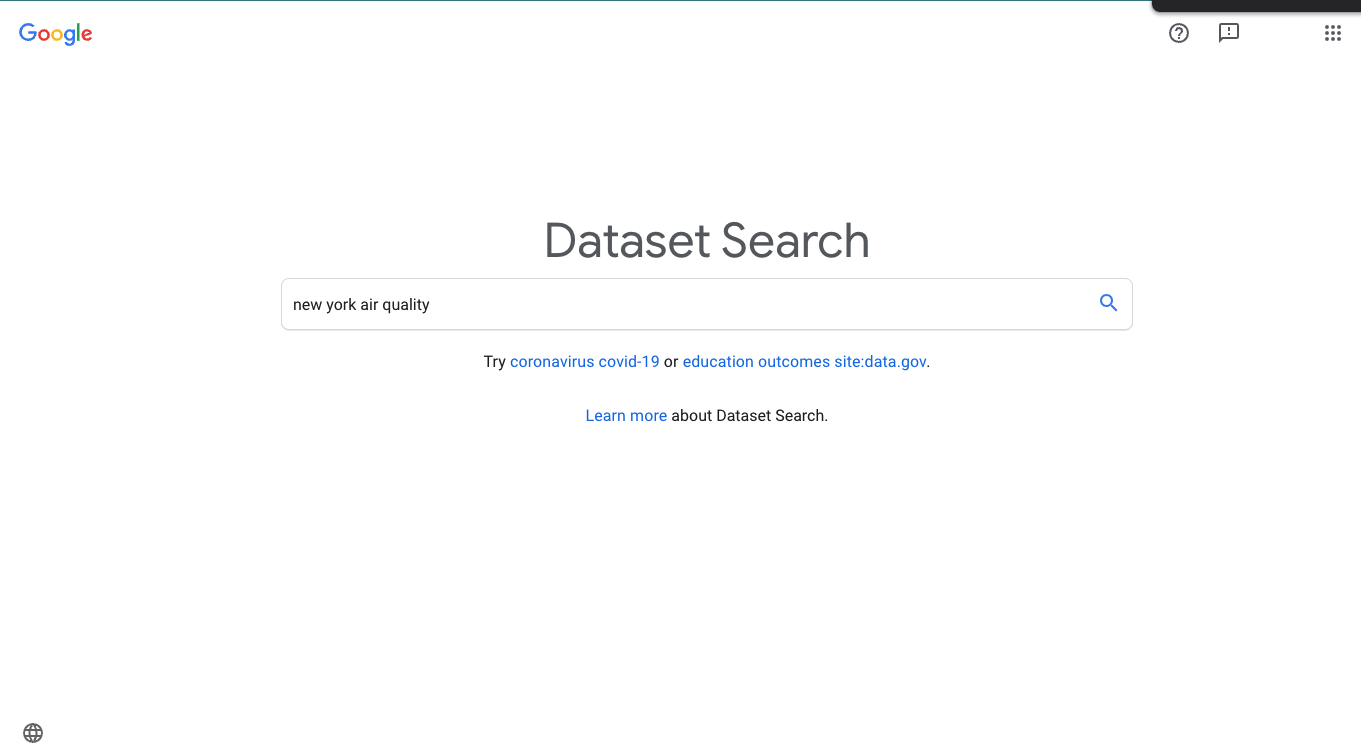

Here is an example search for a dataset on New York air quality. While search results include a description and some basic information, to access the dataset you usually need to click through to the website that hosts is hosting the data.

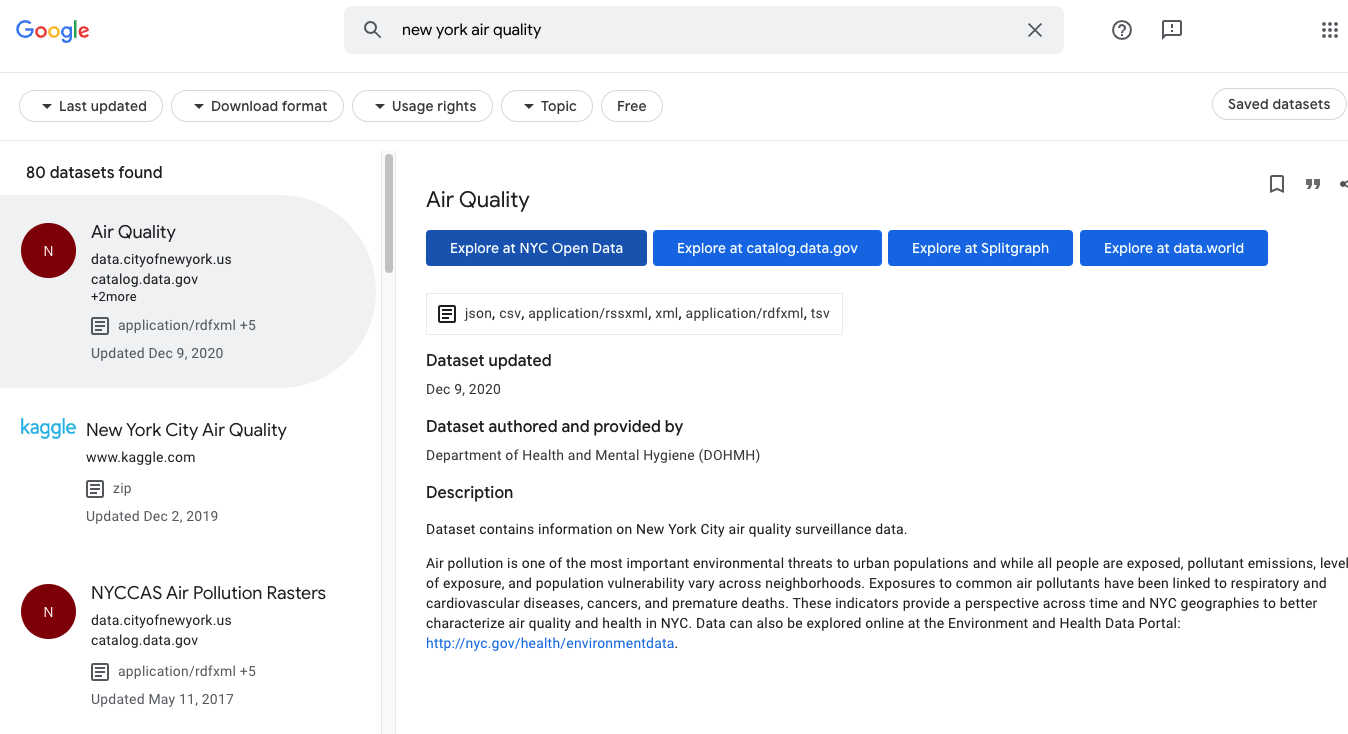

After clicking on the link to NYC Open Data where the dataset is hosted, we're able to find a download link to the data in CSV format. 

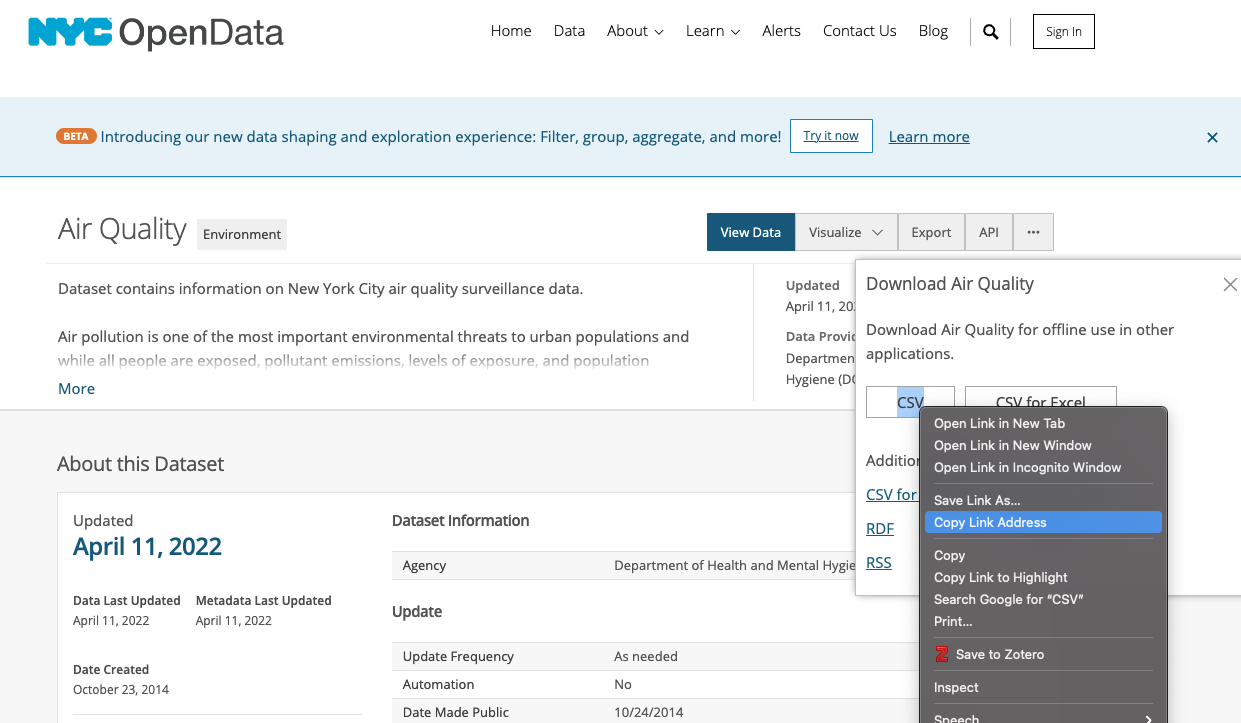

# .CSV Files
For small datsets, you may often find that your dataset comes in a CSV file. CSV files store data as a text document, where each line of the document is a datapoint and commas separate the values within a line. Each line contains the same number of comma separated values, effectively creating columns in our text file. Each column represents a feature of our data - for example, a CSV file of datapoints representing humans might have a column for 'Name', 'Age', 'Height', etc. The names of each column are often listed on the first line of a CSV file. This is what the Air Quality CSV file looks like if we open it in a text editor.

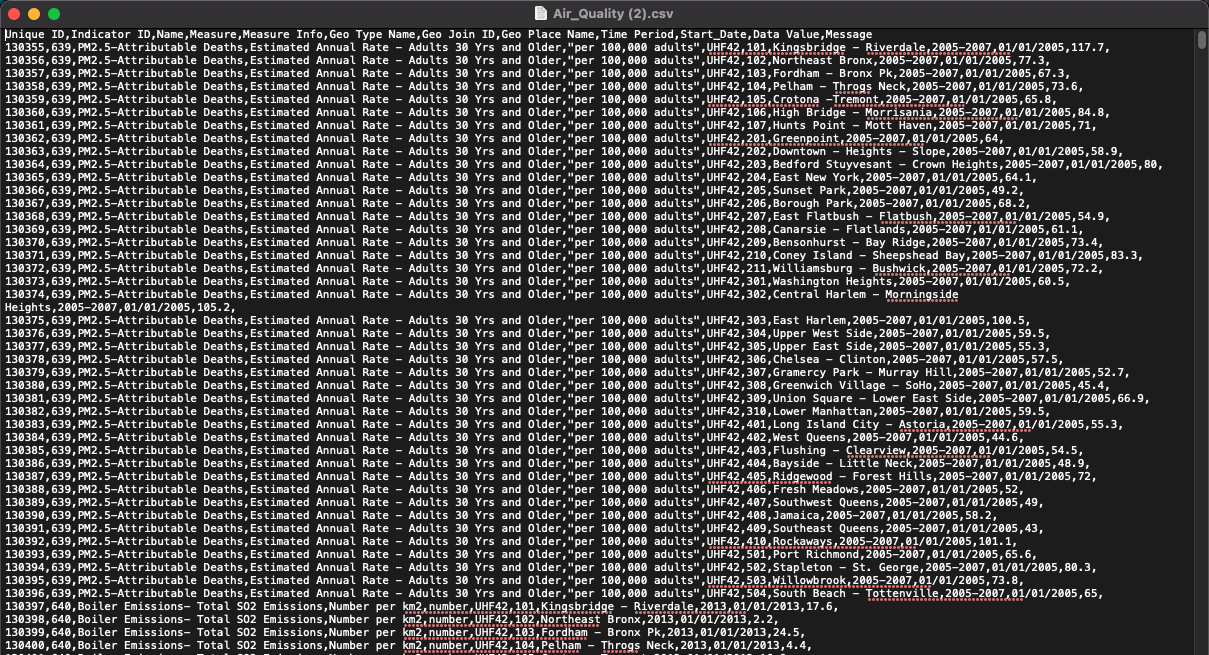

While we can see the comma separation, it is a bit hard to inspect the data like this. Luckily we can easily load CSV files using the pandas read_csv() method - just provide a filepath or url to the CSV file!

In [ ]:
import pandas as pd

air_data = pd.read_csv('https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.csv?accessType=DOWNLOAD') # loading data from the dataset found on GDS
# Our dataset is now loaded as a pandas DataFrame object
# print(type(air_data))

print(air_data.head()) # Print first 5 rows of data

<class 'pandas.core.frame.DataFrame'>
   Unique ID  Indicator ID                       Name  \
0     130355           639  PM2.5-Attributable Deaths   
1     130356           639  PM2.5-Attributable Deaths   
2     130357           639  PM2.5-Attributable Deaths   
3     130358           639  PM2.5-Attributable Deaths   
4     130359           639  PM2.5-Attributable Deaths   

                                           Measure        Measure Info  \
0  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
1  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
2  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
3  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
4  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   

  Geo Type Name  Geo Join ID           Geo Place Name Time Period  Start_Date  \
0         UHF42          101  Kingsbridge - Riverdale   2005-2007  01/01/2005   
1         UH

From here, we can explore, clean, and prune our data (see our pandas tutorial notebook for more info!). Ultimately, we can convert it into a PyTorch Dataset and use it for our machine learning experiments!

# Kaggle
Kaggle is an online platform for sharing datasets and hosting machine learning competitions. If you didn't already have an incentive to learn about AI, these competitions can have $10,000's of prize money! Kaggle has many high quality datasets for anyone with a Kaggle account to use. We will walk through accessing a Kaggle dataset using the Kaggle python library.
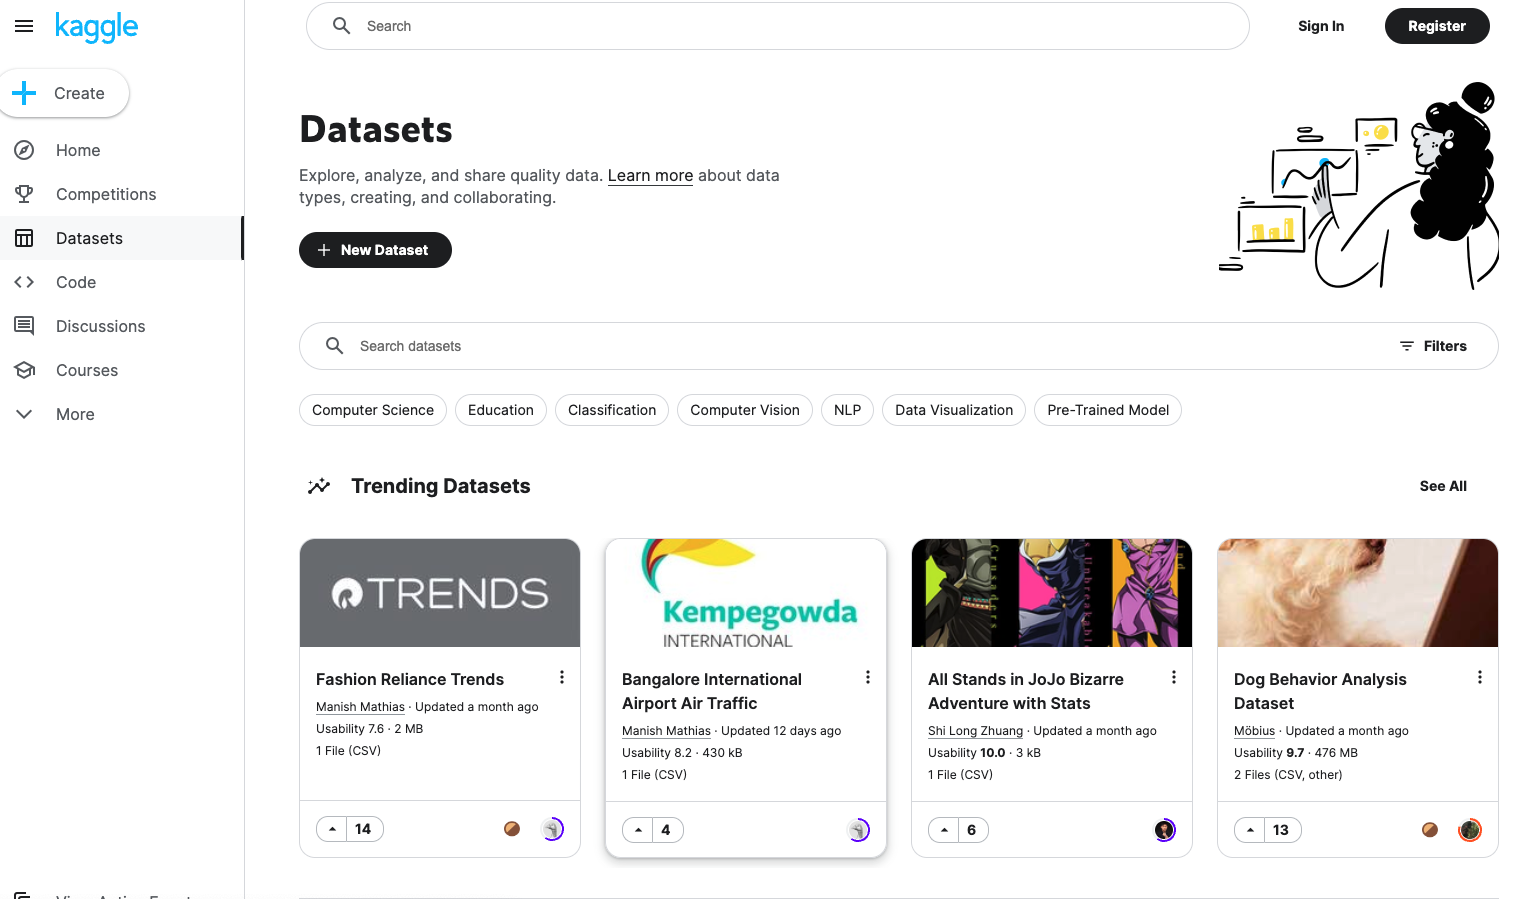

To access a dataset with the Kaggle API, we must first acquire Kaggle API credentials. These credentials tell the Kaggle servers who we are - they won't just give our their datasets to anyone! To get your API credentials, first make a Kaggle account, then navigate to your account settings (click your profile icon on the top right, then click Account). Once there, clicking 'Create new API token' will download a 'kaggle.json' file that contains your credentials.

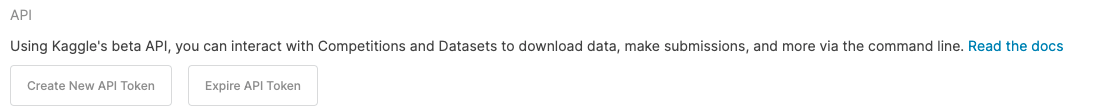

Finally, move kaggle.json into the same folder as your python notebook. On Colab, we must upload the file to our notebook by dragging our file into the Files explorer of Colab (on the left menu bar). The following code will install the Kaggle library and move your uploaded kaggle.json file into an appropriate folder.

In [ ]:
!pip install kaggle # Install the Kaggle library
!mkdir ~/.kaggle # Make a folder for Kaggle API credentials
!cp kaggle.json ~/.kaggle # Move API credentials into Kaggle folder (Must have uploaded kaggle.json API credentials)
!chmod 600 ~/.kaggle/kaggle.json # Change file permissions to allow read/write, not execution

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


Finally, we can use the kaggle API to access a dataset! To do so, we can use the following commands for datsets that belong to a competition or do not belong to a comptition.

! kaggle competitions download <name-of-competition>

OR

! kaggle datasets download <name-of-dataset>

Below, we demonstrate downloading a dataset of supermarket sales data from the Kaggle servers.

In [ ]:
!kaggle datasets download surajjha101/stores-area-and-sales-data

  0% 0.00/9.60k [00:00<?, ?B/s]
100% 9.60k/9.60k [00:00<00:00, 11.8MB/s]


In this case, we see our data was downloaded as a compressed .zip file. Simply unzip the data with the following command:

In [ ]:
!unzip stores-area-and-sales-data.zip

Archive:  stores-area-and-sales-data.zip
  inflating: Stores.csv              


Now that our data is unziped, we can load it into pandas just as before!

In [ ]:
stores_data = pd.read_csv('Stores.csv')
print(stores_data.head())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


# The End
Congratulations, now you know how to find datasets online! However, always remember to inspect your data closely before feeding into a machine learning modeal, as datasets can often come with missing or irrelevant data!